<a href="https://colab.research.google.com/github/KaveeshaChan/SDGP-SE-37/blob/main/Headlight_damage_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'


  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-4r_clmut
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-4r_clmut
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=375641 sha256=1be93fe1859b9dbe05198c7e89853a23f6d14bda90f4c635cd9bc8f1fcfc29a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-y6wq96no/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.7
    Uninstalling pycocotools-2.0.7:
      Successfully uninstalled pycocotools-2.0.7


In [ ]:
!pip install tensorflow-object-detection-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844487 sha256=a1018b66c8d071d26da5d953a7a80704fb37704a1d2d4487f66096f38a578822
  Stored in directory: /root/.cache/pip/wheels/8a/55/68/c084bc2cd93c41fd8f7e2ef9e6bbcb2c35a3e4b49e42044d02
Successfully built tensorflow-object-detection-api


Image, Rename and Convert to png

Convert to PNG and rename file for Headlight Undamaged

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/RenamedDataset2/Renamed/not damaged/headlight"
output_folder = "/content/drive/MyDrive/RenamedDataset2/Renamed2/damaged/headlight/undamged_headlight"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Headlight_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

Convert to PNG and rename file for Headlight(minor )

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/RenamedDataset2/Ashen/dataset/headlight/headlight(minor)"
output_folder = "/content/drive/MyDrive/RenamedDataset2/Renamed2/damaged/headlight/headlight(minor)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Headlight(minor)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

Convert to PNG and rename file for Headlight(moderate)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/RenamedDataset2/Ashen/dataset/headlight/headlight(mod)"
output_folder = "/content/drive/MyDrive/RenamedDataset2/Renamed2/damaged/headlight/headlight(moderate)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Headlight(moderate)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

Convert to PNG and rename file for Headlight(severe)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/RenamedDataset2/Ashen/dataset/headlight/headlight(sev)"
output_folder = "/content/drive/MyDrive/RenamedDataset2/Renamed2/damaged/headlight/headlight(severe)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Headlight(severe)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

In [ ]:
import tensorflow as tf
import os

data_dir = "/content/drive/MyDrive/RenamedDataset2/Renamed2/damaged/headlight"
subdirs = os.listdir(data_dir)

for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        count = len(os.listdir(subdir_path))
        print("Subfolder:", subdir, "Image count:", count)

Subfolder: headlight(minor) Image count: 71
Subfolder: headlight(moderate) Image count: 84
Subfolder: headlight(severe) Image count: 106
Subfolder: undamged_headlight Image count: 87


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2


In [4]:
!pip install split-folders

In [5]:
!pip install split-folders[full]

In [6]:
# Import the splitfolders library for splitting the dataset
import splitfolders
# Split the dataset into training, testing, and validation sets

splitfolders.ratio("/content/drive/MyDrive/RenamedDataset2/Renamed2/damaged/headlight",
                   output="/content/drive/MyDrive/RenamedDataset2/split2",
                   seed=1330, # Seed for reproducibility
                   ratio=(.6, .2, .2), # Ratios for training, testing, and validation sets
                   group_prefix=None) # Prefix for group folders (not used in this case)

# Define the paths for the training, testing, and validation data
data_training_path = "/content/drive/MyDrive/RenamedDataset2/split2/train"
data_testing_path = "/content/drive/MyDrive/RenamedDataset2/split2/test"
data_validating_path = "/content/drive/MyDrive/RenamedDataset2/split2/val"


Copying files: 348 files [02:53,  2.01 files/s]


In [7]:
# Define the width and height of the images to be used in the dataset
img_width = 180
img_height = 180

# Define the batch size for training the model
batch_size = 32

# Create a training dataset from the images in the specified directory
data_train = tf.keras.utils.image_dataset_from_directory(
    data_training_path,  # Path to the directory containing the training images
    shuffle=True,  # Shuffle the data to improve training performance
    image_size=(img_width, img_height),  # Set the size of the images
    batch_size=batch_size,  # Set the batch size for training
    validation_split=None  # No validation split for the training dataset
)

# Create a validation dataset from the images in the specified directory
data_val = tf.keras.utils.image_dataset_from_directory(
    data_validating_path,  # Path to the directory containing the validation images
    image_size=(img_width, img_height),  # Set the size of the images
    batch_size=batch_size,  # Set the batch size for validation
    shuffle=False,  # Do not shuffle the data for validation
    validation_split=None  # No validation split for the validation dataset
)

# Create a testing dataset from the images in the specified directory
data_test = tf.keras.utils.image_dataset_from_directory(
    data_testing_path,  # Path to the directory containing the testing images
    image_size=(img_width, img_height),  # Set the size of the images
    batch_size=batch_size,  # Set the batch size for testing
    shuffle=False,  # Do not shuffle the data for testing
    validation_split=None  # No validation split for the testing dataset
)

# Get the class names from the training dataset
class_names = data_train.class_names  # Get the class names of the images in the training dataset



Found 207 files belonging to 4 classes.
Found 68 files belonging to 4 classes.
Found 73 files belonging to 4 classes.


In [8]:
# Importing the necessary modules
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers

# Define the base MobileNetV2 model with specified input shape, excluding the top layer and using pre-trained weights
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

# Set the base MobileNetV2 model's layers to be non-trainable
base_model.trainable = False

# Using the functional API to build the model
# Define the input layer with the specified shape
inputs = tf.keras.Input(shape=(img_height, img_width, 3))

# Re-define the base MobileNetV2 model with input tensor, excluding top layer, and using pre-trained weights
base_model = MobileNetV2(input_tensor=inputs, include_top=False, weights='imagenet')

# Set the re-defined base MobileNetV2 model's layers to be non-trainable
base_model.trainable = False

# Obtain the output tensor from the base MobileNetV2 model
x = base_model.output

# Add a global average pooling layer to reduce spatial dimensions
x = layers.GlobalAveragePooling2D()(x)

# Add a dense layer with 128 units and ReLU activation function
x = layers.Dense(128, activation='relu')(x)

# Add a dropout layer with a dropout rate of 0.2 to prevent overfitting
x = layers.Dropout(0.2)(x)

# Add a dense output layer with softmax activation for classifying into the number of classes (class_names)
outputs = layers.Dense(len(class_names), activation='softmax')(x)

# Create the final model using the input and output tensors
model = tf.keras.Model(inputs, outputs)

# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# # Define input shape for the images
# img_height = 180
# img_width = 180

# # Define the base model (MobileNetV2) with ImageNet weights
# base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

# # Freeze the base model's weights
# base_model.trainable = False

# # Define the number of classes for damage detection
# num_classes = 4  # Assuming 4 classes: 'undamaged', 'minor damage', 'moderate damage', 'severe damage'

# # Define the Sequential model
# model = Sequential([
#     base_model,  # Add the MobileNetV2 base model
#     GlobalAveragePooling2D(),  # Global average pooling layer
#     Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
#     Dropout(0.2),  # Dropout layer with dropout rate of 0.2
#     Dense(num_classes, activation='softmax')  # Output layer with softmax activation
# ])

# # Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
# model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Define callbacks for early stopping and model checkpointing
# early_stop = EarlyStopping(monitor='val_loss', patience=10)
# model_checkpoint = ModelCheckpoint('damage_detection_model.h5', save_best_only=True)

# # Assuming you have data_train and data_val already defined as image datasets

# # Train the model
# epochs = 25
# history = model.fit(
#     data_train,
#     epochs=epochs,
#     validation_data=data_val,
#     callbacks=[early_stop, model_checkpoint]
# )

# # Evaluate the model on the testing set
# test_loss, test_accuracy = model.evaluate(data_test)
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


In [9]:
epochs = 25  # Number of epochs for training

# Fit the model to the training data and validate using validation data
history = model.fit(
    data_train,  # Training data
    validation_data=data_val,  # Validation data for evaluation
    epochs=epochs  # Number of training epochs
)


Epoch 1/25
7/7 [==============================] - 41s 4s/step - loss: 1.7237 - accuracy: 0.3285 - val_loss: 1.3532 - val_accuracy: 0.4118
Epoch 2/25
7/7 [==============================] - 28s 2s/step - loss: 1.1653 - accuracy: 0.4541 - val_loss: 1.3057 - val_accuracy: 0.4265
Epoch 3/25
7/7 [==============================] - 19s 2s/step - loss: 0.9173 - accuracy: 0.6087 - val_loss: 1.2466 - val_accuracy: 0.4412
Epoch 4/25
7/7 [==============================] - 20s 2s/step - loss: 0.8455 - accuracy: 0.6329 - val_loss: 1.3259 - val_accuracy: 0.4265
Epoch 5/25
7/7 [==============================] - 17s 2s/step - loss: 0.7163 - accuracy: 0.6715 - val_loss: 1.2895 - val_accuracy: 0.5441
Epoch 6/25
7/7 [==============================] - 23s 3s/step - loss: 0.7700 - accuracy: 0.6860 - val_loss: 1.2358 - val_accuracy: 0.5294
Epoch 7/25
7/7 [==============================] - 17s 2s/step - loss: 0.6239 - accuracy: 0.7585 - val_loss: 1.1995 - val_accuracy: 0.5000
Epoch 8/25
7/7 [==================

In [10]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(data_test)

# Calculate additional metrics
predictions = model.predict(data_test)
y_true = np.concatenate([y for x, y in data_test], axis=0)
y_pred = np.argmax(predictions, axis=1)

# Calculate precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_true, y_pred)
precision_result = precision.result().numpy()

# Calculate recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_true, y_pred)
recall_result = recall.result().numpy()

# Calculate F1 score
f1_score = 2 * (precision_result * recall_result) / (precision_result + recall_result)

# Print evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision_result)
print("Recall:", recall_result)
print("F1 Score:", f1_score)


3/3 [==============================] - 4s 488ms/step
Test Loss: 1.3190032243728638
Test Accuracy: 0.5205479264259338
Precision: 0.8196721
Recall: 0.86206895
F1 Score: 0.8403361737678474


In [11]:
# Save the trained model to a file
model.save('headlight_damage_model_updated.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('headlight_damage_model_mobilenet.keras')


Found 73 images belonging to 4 classes.
3/3 [==============================] - 4s 468ms/step - loss: 1.3190 - accuracy: 0.5205
Test accuracy: 0.5205479264259338
3/3 [==============================] - 7s 944ms/step


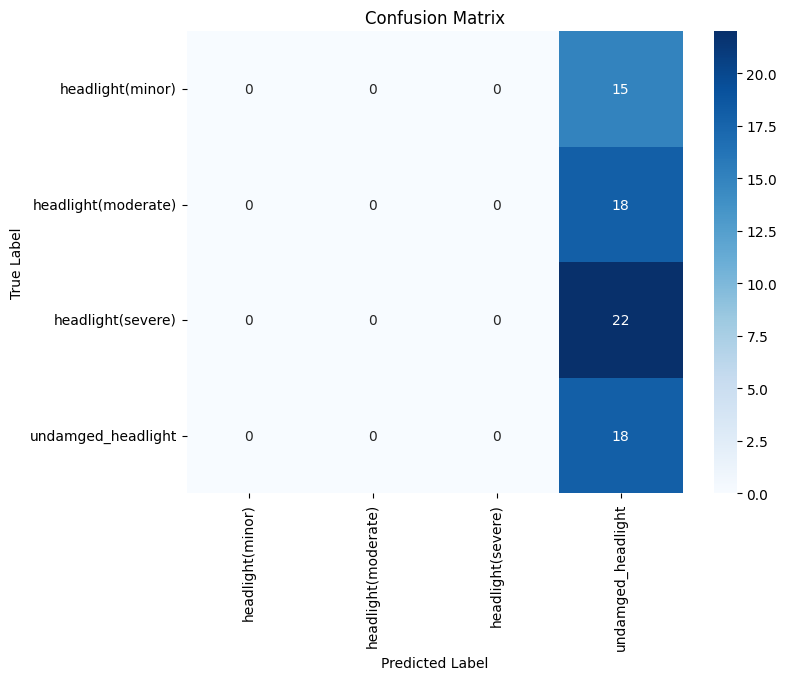

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# load the saved model
model = tf.keras.models.load_model('headlight_damage_model_updated.h5')

# define test data directory and image size
test_dir = '/content/drive/MyDrive/RenamedDataset2/split2/test'
img_size = (224, 224)

# define batch size and create test data generator
batch_size = 32

# Create an image data generator for test data with rescaling
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Generate test data from the specified directory
test_data = test_datagen.flow_from_directory(
    test_dir,  # Directory containing test images
    target_size=img_size,  # Resize images to match the model's expected input size
    batch_size=batch_size,  # Set the batch size for testing
    class_mode='categorical',  # Use categorical mode for one-hot encoded class labels
    shuffle=False  # Do not shuffle the test data to maintain order
)

# evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(data_test)
# print the test accuracy
print('Test accuracy:', test_accuracy)

# make predictions on the test data
y_pred = model.predict(test_data, verbose=1)
y_pred = np.argmax(y_pred, axis=1)

# get true labels of the test data
y_true = test_data.classes

# generate confusion matrix
cm = confusion_matrix(y_true, y_pred)


# # make predictions on the test data
# y_pred = model.predict(test_data, verbose=1)
# y_pred = np.argmax(y_pred, axis=1)

# # get true labels of the test data
# y_true = test_data.classes

# # generate confusion matrix
# cm = confusion_matrix(y_true, y_pred)

# plot confusion matrix as heatmap
class_names = test_data.class_indices.keys() # Get class names from the test data generator
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names) # Create a DataFrame for the confusion matrix with class names as indices and columns
plt.figure(figsize=(8, 6)) # Create a figure for plotting the confusion matrix as a heatmap
sns.heatmap(df_cm, annot=True, cmap='Blues') # Plot the confusion matrix as a heatmap using seaborn
plt.title('Confusion Matrix') # Set the title for the plot
plt.xlabel('Predicted Label') # Set the x-axis label for the plot
plt.ylabel('True Label') # Set the y-axis label for the plot
plt.show() # Display the plot


3/3 [==============================] - 8s 888ms/step


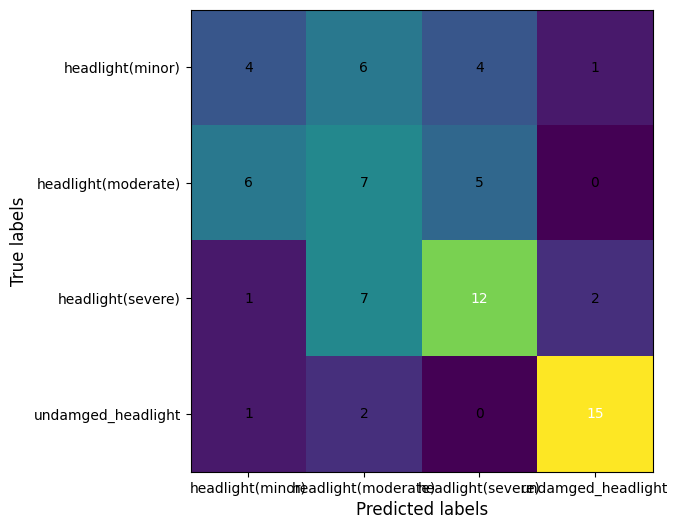


Classification Report:
                     precision    recall  f1-score   support

   headlight(minor)       0.33      0.27      0.30        15
headlight(moderate)       0.32      0.39      0.35        18
  headlight(severe)       0.57      0.55      0.56        22
 undamged_headlight       0.83      0.83      0.83        18

           accuracy                           0.52        73
          macro avg       0.51      0.51      0.51        73
       weighted avg       0.52      0.52      0.52        73

Accuracy: 0.5205479264259338
Loss: 1.3190032243728638


In [13]:
import matplotlib.pyplot as plt # Import matplotlib for plotting
import numpy as np # Import NumPy for numerical operations
from sklearn.metrics import confusion_matrix, classification_report # Import functions for evaluation

# Evaluate the model on the test set
loss, accuracy = model.evaluate(data_test)

# Get predictions
y_pred_prob = model.predict(data_test)  # Predicted probabilities for each class
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # Predicted class labels (indices)

# Convert data_test labels to numpy array
y_true = np.concatenate([y for x, y in data_test], axis=0)

# Get the class names from the data generator
class_names = data_test.class_names

# Calculate metrics
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Calculate the classification report including precision, recall, f1-score, and support
classification_rep = classification_report(y_true, y_pred_classes, target_names=class_names)

# Display the confusion matrix as an image using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axes
ax.imshow(confusion_mtx)  # Display the confusion matrix as an image
ax.grid(False)  # Disable grid lines
ax.set_xlabel('Predicted labels', fontsize=12, color='black')  # Set x-axis label
ax.set_ylabel('True labels', fontsize=12, color='black')  # Set y-axis label
ax.set_xticks(np.arange(len(class_names)))  # Set x-axis tick positions
ax.set_yticks(np.arange(len(class_names)))  # Set y-axis tick positions
ax.set_xticklabels(class_names, fontsize=10, color='black')  # Set x-axis tick labels
ax.set_yticklabels(class_names, fontsize=10, color='black')  # Set y-axis tick labels

# Add the actual numbers in the cells of the confusion matrix
thresh = confusion_mtx.max() / 2  # Threshold for text color
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(j, i, format(confusion_mtx[i, j], 'd'),
                ha="center", va="center",
                color="white" if confusion_mtx[i, j] > thresh else "black")

plt.show()  # Show the plot

# Print the classification report
print('\nClassification Report:')
print(classification_rep)
# Print the accuracy and loss obtained from model evaluation
print('Accuracy:', accuracy)
print('Loss:', loss)


1/1 [==============================] - 1s 947ms/step
The uploaded image shows Moderate damage with a confidence of 66.69029593467712 %.


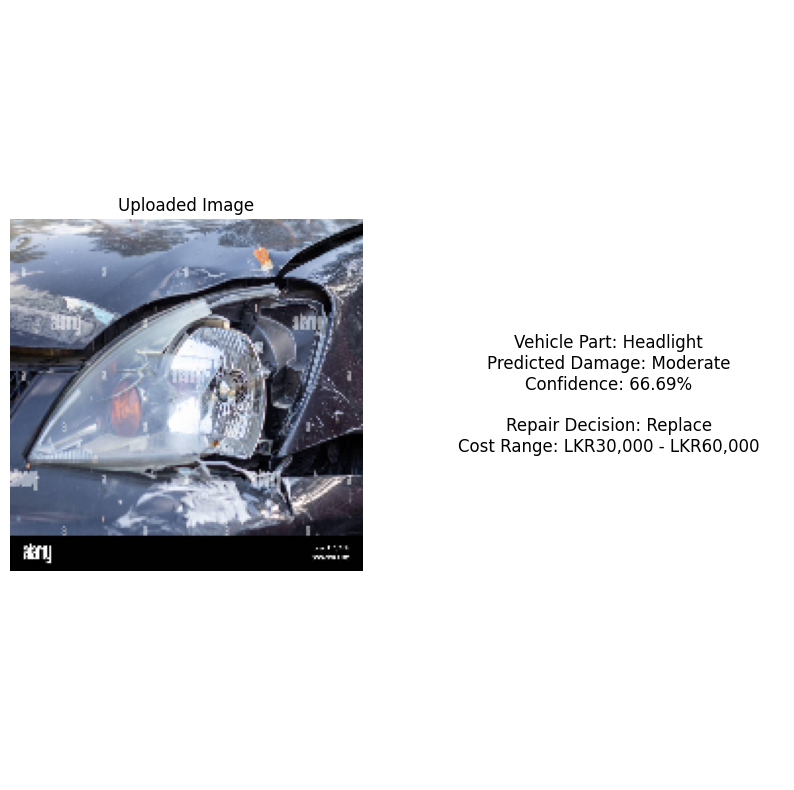

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('headlight_damage_model_updated.h5')

# Define image dimensions
img_width = 180
img_height = 180


# Function to estimate cost range and decision based on damage severity for headlight
def estimate_headlight_cost(severity):
    if severity == "Minor":
        return "Repair", "LKR2,500 - LKR6,000"
    elif severity == "Moderate":
        return "Replace", "LKR30,000 - LKR60,000"
    elif severity == "Severe":
        return "Replace", "LKR30,500 - LKR60,000"
    else:
        return "N/A", "N/A"

# Load and preprocess the image
image_path = "/content/drive/MyDrive/RenamedDataset2/split2/test/headlight(minor)/Headlight(minor)_14.png"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.expand_dims(image_array, 0)

# Predict the class of the image
prediction = loaded_model.predict(image_array)
predicted_class_index = np.argmax(prediction)
confidence = np.max(prediction) * 100

# Define class names
class_names = ['undamaged', 'minor damage', 'moderate damage', 'severe damage']

# Check if the predicted class indicates damage
if class_names[predicted_class_index] != 'undamaged':
    # Further analyze the confidence level to categorize the damage
    if confidence >= 80:
        damage_category = 'Severe'
    elif confidence >= 60:
        damage_category = 'Moderate'
    else:
        damage_category = 'Minor'

    # Print information about the predicted damage category and confidence level
    print("The uploaded image shows", damage_category, "damage with a confidence of", confidence, "%.")

    # Estimate damage cost based on severity
    repair_decision, cost_range = estimate_headlight_cost(damage_category)

    # Display the image with the predicted damage category and cost information
    plt.figure(figsize=(10, 10))  # Create a figure for plotting
    plt.subplot(1, 2, 1)  # Create a subplot for the uploaded image
    plt.imshow(image)  # Display the uploaded image
    plt.title("Uploaded Image")  # Set the title for the subplot
    plt.axis("off")  # Turn off axis labels

    plt.subplot(1, 2, 2)  # Create a subplot for the damage category and cost information
    text = f"Vehicle Part: Headlight\n"  # Define the text for the subplot
    text += f"Predicted Damage: {damage_category}\n"  # Add predicted damage category to text
    text += f"Confidence: {confidence:.2f}%\n\n"  # Add confidence level to text
    text += f"Repair Decision: {repair_decision}\n"  # Add repair decision to text
    text += f"Cost Range: {cost_range}"  # Add cost range to text
    plt.text(0.5, 0.5, text, horizontalalignment='center', verticalalignment='center', fontsize=12)  # Display text
    plt.axis("off")  # Turn off axis labels

    plt.show()  # Show the plot
else:
    # Print if no damage is detected in the uploaded image
    print("The uploaded image shows no damage.")

    # Display the undamaged image
    plt.figure(figsize=(6, 6))  # Create a figure for plotting
    plt.imshow(image)  # Display the undamaged image
    plt.title("Undamaged headlight")  # Set the title for the plot
    plt.axis("off")  # Turn off axis labels
    plt.show()  # Show the plot
